In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import datasets
from tensorflow.keras.utils import to_categorical

/Users/wojtek/miniforge3/lib/python3.9/site-packages/requests/__init__.py:102: RequestsDependencyWarning: urllib3 (1.26.9) or chardet (5.0.0)/charset_normalizer (2.0.12) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({})/charset_normalizer ({}) doesn't match a supported "


**Proszę nie używać dostępnych bibliotek sieci neuronowych. Do implementacji sieci proszę użyć macierzy stosując bibliotekę numpy.**

#1. Wczytaj pełny zbiór danych iris. Zaproponuj i zrealizuj podział tych danych na dane treningowe i dane testowe oraz przeprowadź na nich normalizacje,

In [8]:
iris = datasets.load_iris()
X = iris.data
y = iris.target
y = to_categorical(y)

#norm=np.linalg.norm(y)
#y/=norm

print(np.shape(X))
print(np.shape(y))
# print(y)

(150, 4)
(150, 3)


#2. Zaproponuj optymalną sieć neuronową klasyfikującą wczytane dane. Użyj nieliniowej funkcji aktywacji w warstwie ukrytej (np. tanh lub sigmoidalna). Stosując propagację wsteczną błędu, wytrenuj sieć metodą wsadową.

In [10]:
class Sigmoid():
    def acti(self, x):
        return 1 / (1 + np.exp(-x))

    def der(self, x):
        a = self(x)
        return a * (1 - a)

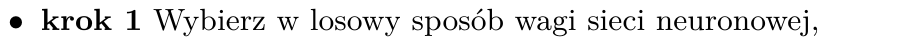

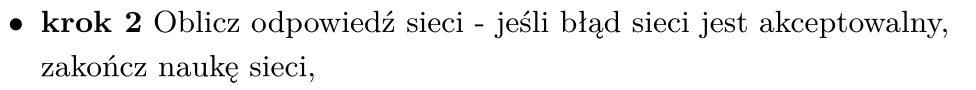

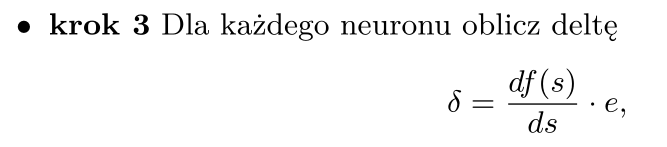

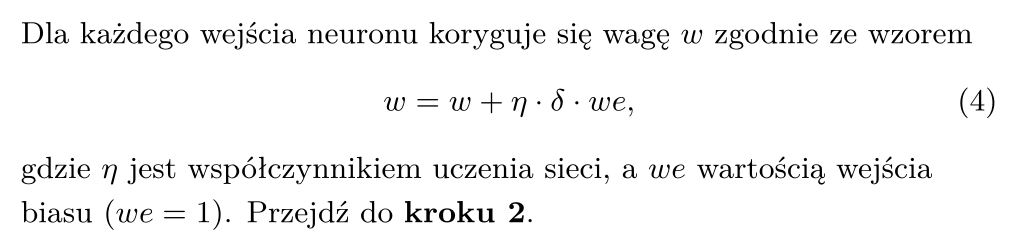

In [3]:
class Neuron:
    def __init__(self, input, acti, eta):
        self.W = np.random.rand(input)
        self.Wb = np.random.rand(1)[0]
        self.acti = acti
        self.eta = eta

    def predict(self, x):
        self.s = np.dot(self.W, x) + self.Wb
        return self.acti.acti(x)

    def fit(self, e):
        error = np.dot(e, self.W)
        delta = self.acti.der(self.s) - error
        self.W += self.eta * delta
        return error

W przypadku warstw ukrytych błąd dla neuronu liczy się jako suma iloczynów wagi łączącej z kolejną warstwą i błędem danego neuronu kolejnej warstwy, ważne żeby wagi z kolejnej warstwy pobrać przed ich modyfikacją. W przypadku warstwy wyjściowej błąd liczymy bezpośrednio

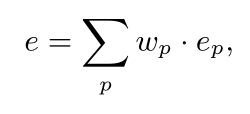

In [4]:
class Layer:
    def __init__(self, input, output, acti, eta):
        self.neurons = []
        for i in range(output):
            self.neurons.append(Neuron(input, acti, eta))

    def predict(self, x):
        return np.array([n.predict(x) for n in self.neurons])

    def fit(self, e):
        errors = np.array([n.fit(e) for n in self.neurons])
        return errors

In [5]:
class NeuronNetwork:
    def __init__(self, layers, acti, eta):
        self.layers = []
        for i in range(1, len(layers)):
            self.layers.append(Layer(layers[i - 1], layers[i], acti, eta))

    def predict(self, x):
        res = self.layers[0].predict(x)
        for l in self.layers[1:]:
            res = l.predict(res)
        return res

    def fit(self, X, y, e):
        errors = e
        for layer in self.layers[::-1]:
            errors = layer.fit(errors)


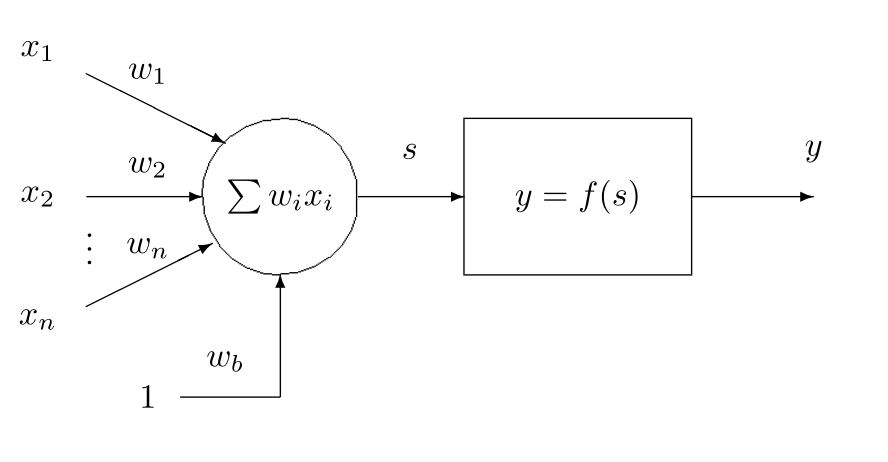

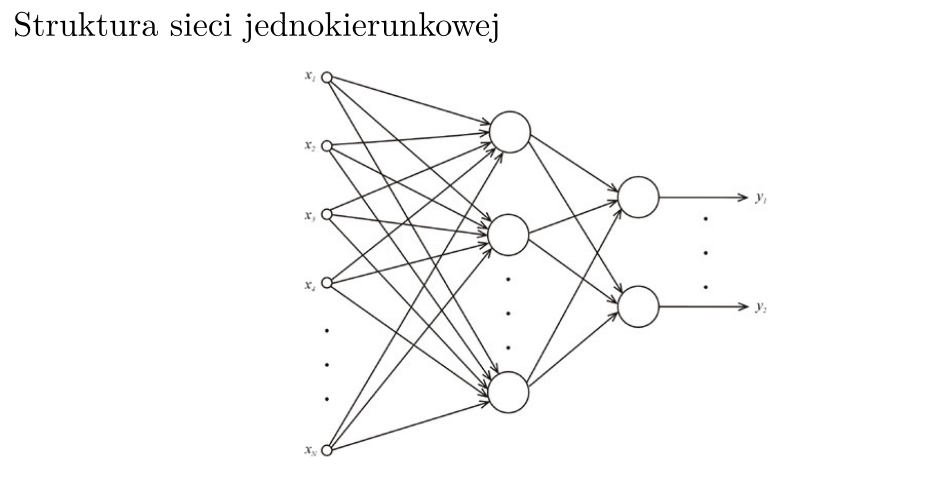

In [ ]:
def batch(NN, epoch=100):
    for i in range(epoch):
        e = 0
        for xe, ye in zip(X, y):
            p = NN.predict(xe)
            e += (p - ye)
        e /= len(X)
        NN.fit(X, y, e)


# 3. Zwróć w postaci wykresu informacje o zmianie dokładności i straty w trakcie uczenia. Czyli zapisz i pokaż, jaki był wyliczany błąd oraz jaka była dokładność w każdej epoce. Przy której epoce dalsza nauka nie miała już sensu?

# 4. Zmień sposób podawania sieci z wsadowej na on line. Wytrenuj sieć. Oceń działanie sieci.

In [6]:
def online(NN, epoch=100):
    for i in range(epoch):
        for xe, ye in zip(X, y):
            e = NN.predict(xe)
            e -= ye
            NN.fit(X, y, e)

In [11]:
# batch(NeuronNetwork([4, 10, 20, 50, 3], Sigmoid(), 0.001), 1)
online(NeuronNetwork([4, 10, 20, 50, 3], Sigmoid(), 0.001), 1)

ValueError: shapes (20,) and (20,10,4) not aligned: 20 (dim 0) != 10 (dim 1)

#5. Przetestuj sieć na innych funkcjach aktywacji.

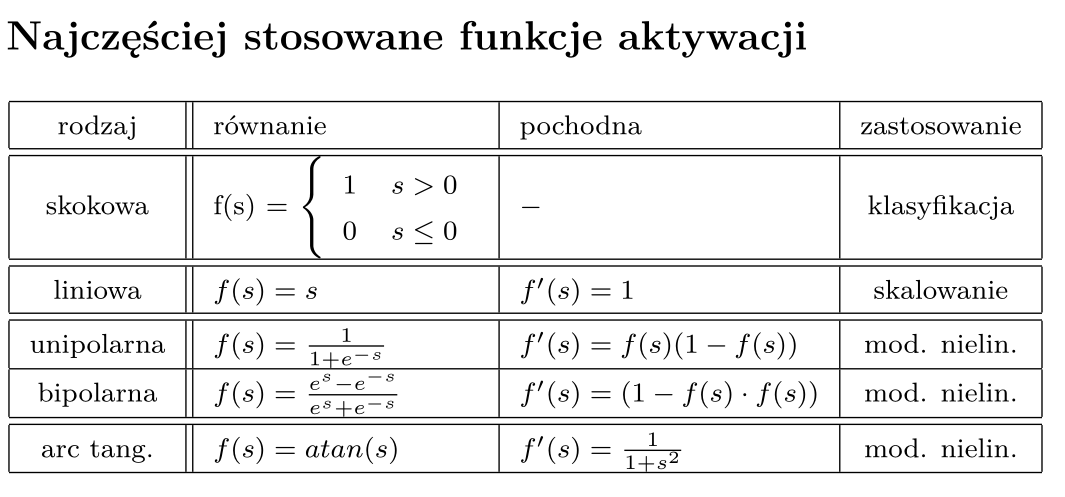